# 제안


### &nbsp;&nbsp;코레일 지하철 데이터를 활용하여 일상적인 상황과 코로나 상황에 따른 지하철 이용객수 차이를 찾아보고 그것을 어떻게 활용할지 고민해보았습니다. 지하철을 타는 사람들의 관심은 자신의 출발역과 목적지인 하차역에 있습니다. 그외의 역들은 정차해도 그만 정차하지 않아도 그만입니다. 

### &nbsp;&nbsp;하지만 반대로 코로나19가 유행하면서 하차하는 역 외에 하차하지 않는 역에대한 정보 또한 관심사가 되었습니다. 확진자수가 폭증한 지역 주변의 역들을 지나가다보면 혹시나 하는 마음에 마스크를 단단하게 매곤 하는 사람들을 보면서 저희는 지하철들이 무조건 모든 역에 정차하지 않아도 되는것이 아닌가 하는 생각을 하였습니다.

###  &nbsp;&nbsp;지하철 시간표를 다변화하여 본인이 필요한 출발역과 도착역에 하차하는 지하철편을 찾아 이용하도록 한다면 지하철 이용객들의 시간적 공간적 격리가 자동적으로 이루어저 코로나 폭증지역과 그렇지 않은 지역의 지하철역을 이용하는 사람들간의 접촉이 적어질 것으로 생각합니다. 저희팀은 이러한 제안을 가지고 데이터를 분석해보았습니다.



# 데이터분류

###  &nbsp;&nbsp;교통빅데이터플랫폼에서 받은 광역 일별·역별 시간대별 승하차 실적 데이터의 2019년 인덱스와 2020년 인덱스에 차이가 있기에 데이터 분석을 위해 중복되지 않는 날짜 데이터와 역별 데이터들을 먼저 제거하였습니다.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from tqdm import tqdm
import matplotlib as mpl
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import os
import sys
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 지하철 승하차 데이터 불러오기

In [3]:
subway_2019 = pd.read_csv("./data/Rail/City/2019.csv", encoding="utf-8")
subway_2019.head()

,RUN_DT,SBWY_STN_PRPR_NO,SBWY_STN_CD_NM,TMWD_DV,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
0,20190101,1001,서울,00시,7,22
1,20190101,1001,서울,05시,10,1
2,20190101,1001,서울,06시,35,4
3,20190101,1001,서울,07시,31,39
4,20190101,1001,서울,08시,43,101


In [4]:
subway_2020 = pd.read_csv("./data/Rail/City/2020.csv", encoding="utf-8")
subway_2020.head()

,RUN_DT,SBWY_STN_PRPR_NO,SBWY_STN_CD_NM,TMWD_DV,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
0,20200101,1001,서울,00시,4,13
1,20200101,1001,서울,05시,13,1
2,20200101,1001,서울,06시,59,5
3,20200101,1001,서울,07시,32,70
4,20200101,1001,서울,08시,61,113


### ,(쉼표) 를 제거하기 전 회기역 숫자 데이터

In [5]:
subway_2019[subway_2019['SBWY_STN_CD_NM']=='회기'].tail()

,RUN_DT,SBWY_STN_PRPR_NO,SBWY_STN_CD_NM,TMWD_DV,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
852442,20190531,1015,회기,19시,"2,880","1,838"
852443,20190531,1015,회기,20시,"1,778","1,460"
852444,20190531,1015,회기,21시,"1,810","1,507"
852445,20190531,1015,회기,22시,"1,892","1,447"
852446,20190531,1015,회기,23시,"1,438",982


### ,(쉼표) 를 제거한 후 회기역 숫자 데이터

In [6]:
subway_2019['SBWY_ABRD_PRNB'] = subway_2019['SBWY_ABRD_PRNB'].str.replace('-', '0').str.replace(',', '').astype(int)
subway_2019['SBWY_GOFF_PRNB'] = subway_2019['SBWY_GOFF_PRNB'].str.replace('-', '0').str.replace(',', '').astype(int)
subway_2020['SBWY_ABRD_PRNB'] = subway_2020['SBWY_ABRD_PRNB'].str.replace('-', '0').str.replace(',', '').astype(int)
subway_2020['SBWY_GOFF_PRNB'] = subway_2020['SBWY_GOFF_PRNB'].str.replace('-', '0').str.replace(',', '').astype(int)
subway_2019[subway_2019['SBWY_STN_CD_NM']=='회기'].tail()

,RUN_DT,SBWY_STN_PRPR_NO,SBWY_STN_CD_NM,TMWD_DV,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
852442,20190531,1015,회기,19시,2880,1838
852443,20190531,1015,회기,20시,1778,1460
852444,20190531,1015,회기,21시,1810,1507
852445,20190531,1015,회기,22시,1892,1447
852446,20190531,1015,회기,23시,1438,982


### 데이터를 측정한 시간대를 조정

역별, 일별로 데이터를 측정한 시간대가 다소 차이가 있어 들쑥날쑥한 시간대를 최대한 제거

In [7]:
# 시간이 온전히 나와있는 데이터만 쓰기 위해 데이터를 분류했습니다.
'''subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "19시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "20시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "21시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "22시"]'''
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "23시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "00시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "01시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "02시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "03시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "04시"]
subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "05시"]
#subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "06시"]
#subway_2019 = subway_2019[subway_2019['TMWD_DV'] != "07시"]

'''subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "19시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "20시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "21시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "22시"]'''
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "23시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "00시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "01시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "02시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "03시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "04시"]
subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "05시"]
#subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "06시"]
#subway_2020 = subway_2020[subway_2020['TMWD_DV'] != "07시"]

subway_2019.index = [i for i in range(len(subway_2019))]
subway_2020.index = [i for i in range(len(subway_2020))]

print("2019 년도 데이터 크기 :", len(subway_2019))
print("2020 년도 데이터 크기 :", len(subway_2020))

2019 년도 데이터 크기 : 701753
2020 년도 데이터 크기 : 707729


### 새로운 역의 추가 감소를 제거

In [8]:
#중복되지 않는 역명을 구분했습니다.
subway_2019_group = subway_2019.groupby('SBWY_STN_CD_NM')[['SBWY_STN_CD_NM', 'SBWY_ABRD_PRNB', 'SBWY_GOFF_PRNB']].sum()
subway_2020_group = subway_2020.groupby('SBWY_STN_CD_NM')[['SBWY_STN_CD_NM', 'SBWY_ABRD_PRNB', 'SBWY_GOFF_PRNB']].sum()
rmv_2020_stn = list(set(subway_2020_group.index) - set(subway_2019_group.index))
rmv_2019_stn = list(set(subway_2019_group.index) - set(subway_2020_group.index))

print("2020년도에 추가된 역 목록 :", rmv_2020_stn)
print("2020년도에 사라진 역 목록 :", rmv_2019_stn)

for rmv in rmv_2020_stn:
    subway_2020 = subway_2020[subway_2020['SBWY_STN_CD_NM'] != rmv]

for rmv in rmv_2019_stn:
    subway_2019 = subway_2019[subway_2019['SBWY_STN_CD_NM'] != rmv]

subway_2019.shape, subway_2020.shape

2020년도에 추가된 역 목록 : ['부산원동', '임진강']
2020년도에 사라진 역 목록 : []


((701753, 6), (706210, 6))

### 연도 포함된 일자 데이터를 가공하여 연도 제거

In [9]:
subway_2019['RUN'] = subway_2019['RUN_DT'] % 1000
subway_2020['RUN'] = subway_2020['RUN_DT'] % 1000
subway_2020.head()

,RUN_DT,SBWY_STN_PRPR_NO,SBWY_STN_CD_NM,TMWD_DV,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB,RUN
0,20200101,1001,서울,06시,59,5,101
1,20200101,1001,서울,07시,32,70,101
2,20200101,1001,서울,08시,61,113,101
3,20200101,1001,서울,09시,56,92,101
4,20200101,1001,서울,10시,68,217,101


### 요일과 총 데이터 크기를 맞추어 주기 위해 데이터 조정

In [10]:
#2019년 1월 1일과 2020년 1월 1일의 요일이 다르기 때문에 생긴 데이터의 부정합 등의 날짜 데이터를 조정하였습니다.
subway_2019 = subway_2019[subway_2019['RUN_DT'] != 20190101]
subway_2020 = subway_2020[subway_2020['RUN_DT'] != 20200530]
subway_2020 = subway_2020[subway_2020['RUN_DT'] != 20200531]

subway_2019.shape, subway_2020.shape

((697109, 7), (696924, 7))

### 모든 역 리스트를 stations 변수에 저장

In [11]:
stations = list(set(subway_2019['SBWY_STN_CD_NM'].values.tolist()))

### 데이터 조정 이후에도 2019와 2020년도의 요일이 맞지 않는 역 데이터를 삭제

In [12]:
rnd_2019 = []
rnd_2020 = []
rmv_stn = []

for station in stations:
    buf_2019 = subway_2019[subway_2019['SBWY_STN_CD_NM'] == station].values.tolist()
    buf_2020 = subway_2020[subway_2020['SBWY_STN_CD_NM'] == station].values.tolist()

    if len(buf_2019) != len(buf_2020):
        rmv_stn.append(station)
        print(station, len(buf_2019), len(buf_2020))

달월 2482 2415
옥수 2241 2262
광명 2550 2549
지평 1381 1322
신원 2550 2547
백양리 2525 2498
상천 2550 2548
강촌 2549 2550
신촌 2550 2549
봉명 2548 2550
굴봉산 2536 2487


In [13]:
#기타 2019년 데이터와 2020년 데이터의 차이를 모두 찾아내 같은 수로 맞추었습니다.
for rmv in rmv_stn:
    subway_2019 = subway_2019[subway_2019['SBWY_STN_CD_NM'] != rmv]
    subway_2020 = subway_2020[subway_2020['SBWY_STN_CD_NM'] != rmv]


stations = list(set(stations) - set(rmv_stn))
print("2019년도 데이터 모양 :", subway_2019.shape)
print("2020년도 데이터 모양 :", subway_2020.shape)

2019년도 데이터 모양 : (670647, 7)
2020년도 데이터 모양 : (670647, 7)


# 정리한 데이터를 이용하여 저희가 생각한 요소들을 적용시켜보았습니다.

## 2019년도 역별 승하차 객수 Top 5

In [14]:
subway_2019_ex = subway_2019.groupby(['SBWY_STN_CD_NM'])[['SBWY_STN_CD_NM', 'SBWY_ABRD_PRNB', 'SBWY_GOFF_PRNB']].mean()
subway_2019_ex = subway_2019_ex.sort_values(by='SBWY_ABRD_PRNB', axis=0, ascending=False)
subway_2019_ex.head(5)

,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
SBWY_STN_CD_NM,,
영등포,3026.937255,2835.316471
수원,2863.968235,2687.225098
용산,2501.081569,2400.081569
부평,2351.520784,2125.581569
부천,2305.091373,2267.553333


## 2019년도 역별 승하차 객수 Top 30

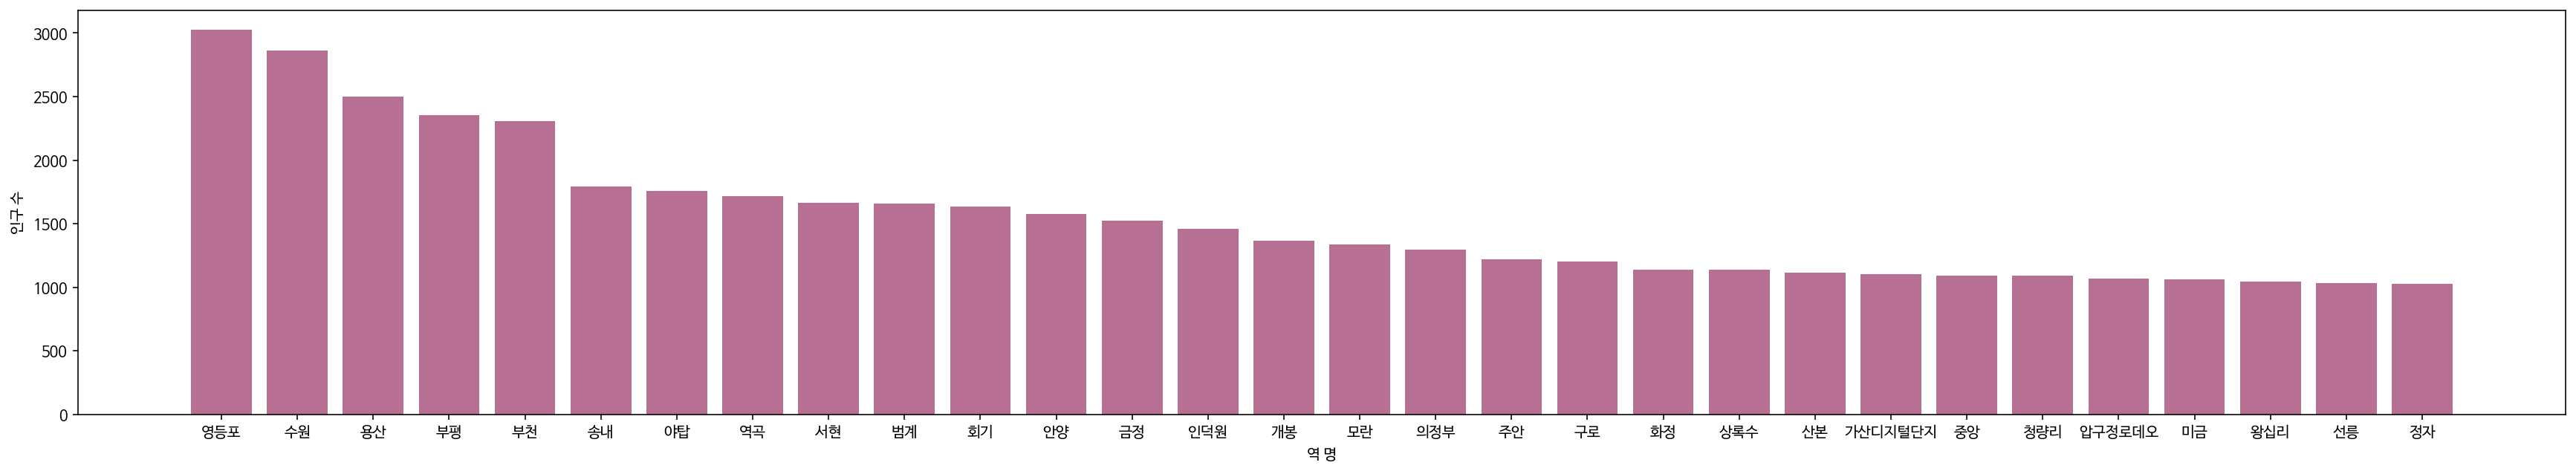

In [15]:
plt.figure(figsize=(30, 5))
plt.bar(subway_2019_ex.index[:30], subway_2019_ex["SBWY_ABRD_PRNB"][:30], color=(0.6,0.2,0.4), alpha=0.7)
plt.ylabel("인구 수")
plt.xlabel("역 명")
plt.show()

## 2020년도 역별 승하차 객수 Top5

In [16]:
subway_2020_ex = subway_2020.groupby(['SBWY_STN_CD_NM'])[['SBWY_STN_CD_NM', 'SBWY_ABRD_PRNB', 'SBWY_GOFF_PRNB']].mean()
subway_2020_ex = subway_2020_ex.sort_values(by='SBWY_ABRD_PRNB', axis=0, ascending=False)
subway_2020_ex.head(5)

,SBWY_ABRD_PRNB,SBWY_GOFF_PRNB
SBWY_STN_CD_NM,,
영등포,2110.448627,1986.972549
수원,1842.478039,1714.078039
용산,1688.271373,1638.949804
부천,1657.923137,1619.711765
부평,1648.965882,1494.514118


## 2020년도 역별 승하차 객수 Top 30

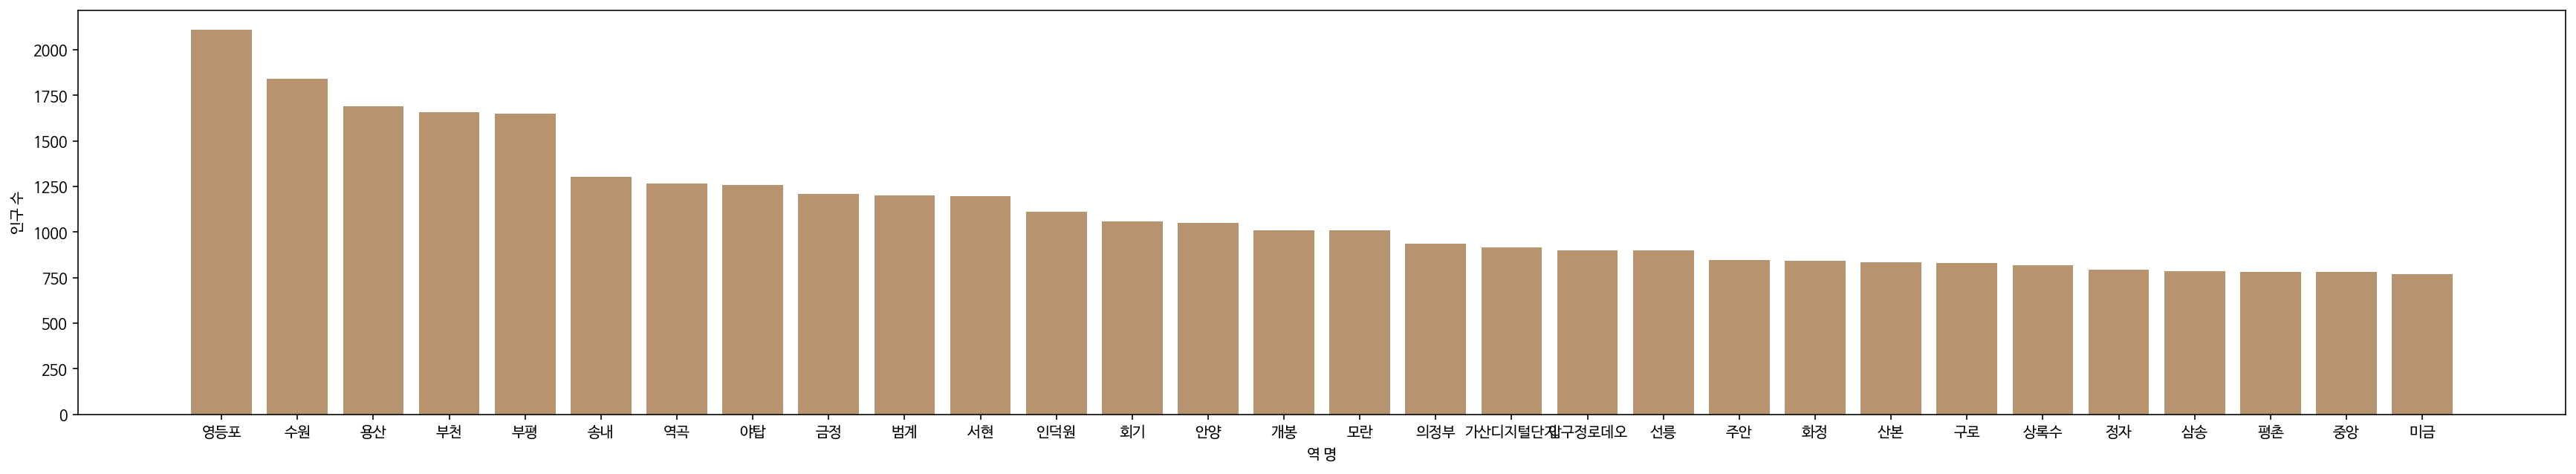

In [17]:
plt.figure(figsize=(30, 5))
plt.bar(subway_2020_ex.index[:30], subway_2020_ex["SBWY_ABRD_PRNB"][:30], color=(0.6,0.4,0.2), alpha=0.7)
plt.ylabel("인구 수")
plt.xlabel("역 명")
plt.show()

### 인덱스 정리

In [18]:
subway_2019.index = [i for i in range(len(subway_2019))]
subway_2020.index = [i for i in range(len(subway_2020))]

## 회기역 데이터 살펴보기

In [19]:
station = '회기'

subway_2019_st = subway_2019[subway_2019['SBWY_STN_CD_NM']==station]
subway_2020_st = subway_2020[subway_2020['SBWY_STN_CD_NM']==station]

subway_2019_st.index = [i for i in range(len(subway_2019_st))]
subway_2020_st.index = [i for i in range(len(subway_2020_st))]

### 전체 데이터 (1월 ~ 5월 까지) 2019 vs 2020 하차 인원수 일별 비교

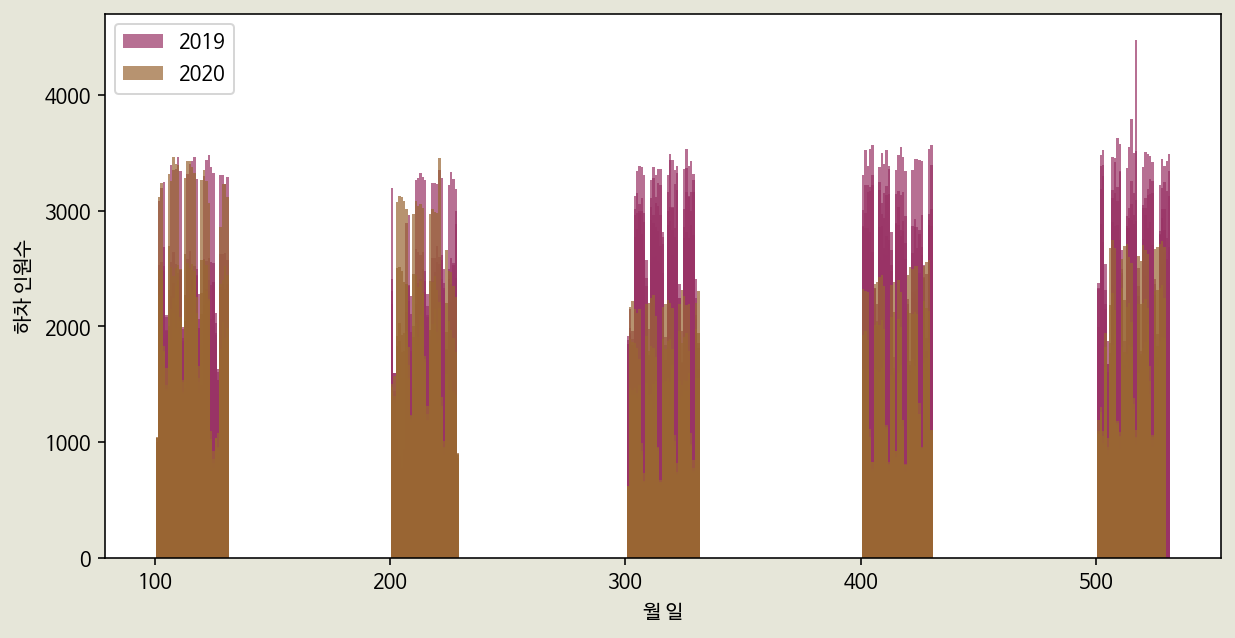

In [20]:
#1월에서 5까지의 하차인원수 비교
plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xlabel("월 일")
plt.ylabel("하차 인원수")
plt.bar(subway_2019_st['RUN'], subway_2019_st['SBWY_GOFF_PRNB'], color=(0.6,0.2,0.4), alpha=0.7, width=1, label='2019')
plt.bar(subway_2020_st['RUN'], subway_2020_st['SBWY_GOFF_PRNB'], color=(0.6,0.4,0.2), alpha=0.7, width=1, label='2020')
plt.legend()
plt.show()

### 1월 2019 vs 2020 하차 인원수 일별 비교

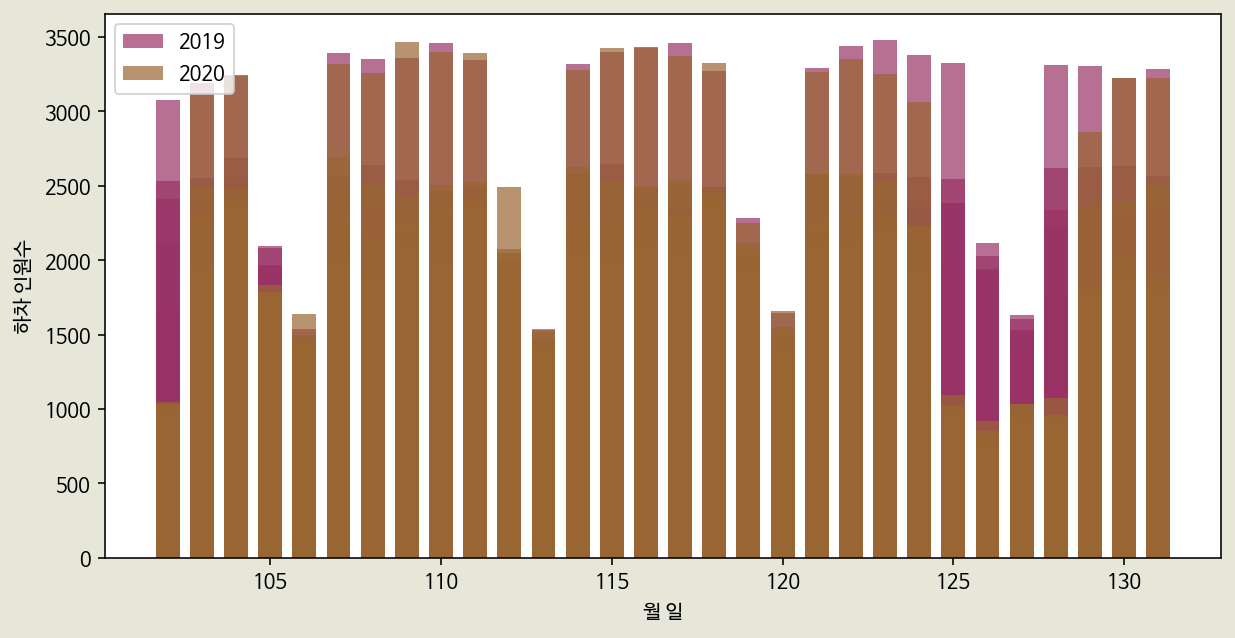

In [21]:
#1월의 하차인원수 일별 비교
start = min(subway_2019_st.index[subway_2019_st['RUN'] == 102])
end = min(subway_2019_st.index[subway_2019_st['RUN'] == 201])

plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xlabel("월 일")
plt.ylabel("하차 인원수")
plt.bar(subway_2019_st['RUN'][start:end], subway_2019_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.2,0.4), alpha=0.7, width=0.7, label='2019')
plt.bar(subway_2019_st['RUN'][start:end], subway_2020_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.4,0.2), alpha=0.7, width=0.7, label='2020')
plt.legend()
plt.show()

### 2월 2019 vs 2020 하차 인원수 일별 비교

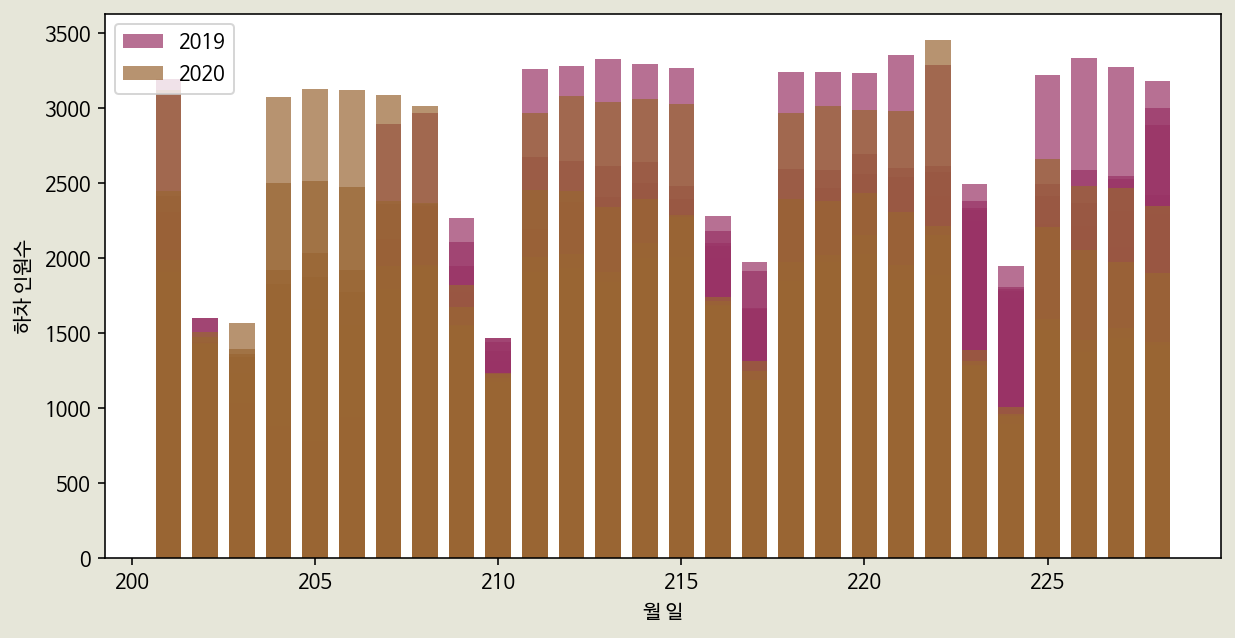

In [22]:
#2월의 하차인원수 일별 비교
start = min(subway_2019_st.index[subway_2019_st['RUN'] == 201])
end = min(subway_2019_st.index[subway_2019_st['RUN'] == 301])

plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xlabel("월 일")
plt.ylabel("하차 인원수")
plt.bar(subway_2019_st['RUN'][start:end], subway_2019_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.2,0.4), alpha=0.7, width=0.7, label='2019')
plt.bar(subway_2019_st['RUN'][start:end], subway_2020_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.4,0.2), alpha=0.7, width=0.7, label='2020')
plt.legend()
plt.show()

### 3월 2019 vs 2020 하차 인원수 일별 비교

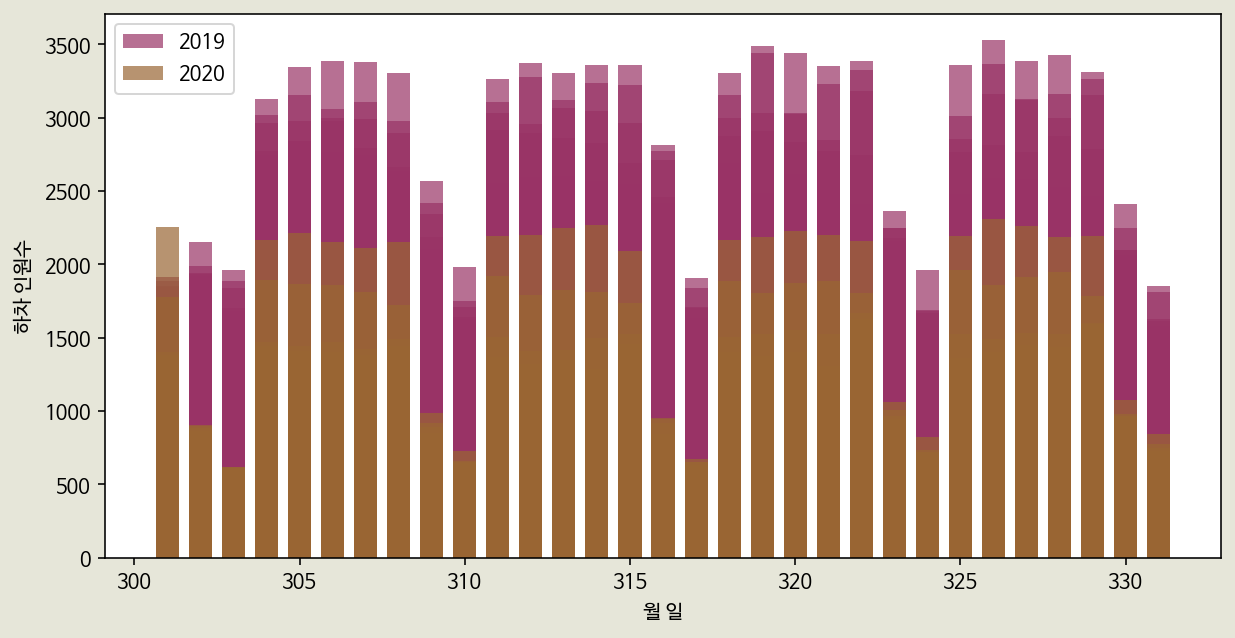

In [23]:
#3월의 하차인원수 일별 비교
start = min(subway_2019_st.index[subway_2019_st['RUN'] == 301])
end = min(subway_2019_st.index[subway_2019_st['RUN'] == 401])

plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xlabel("월 일")
plt.ylabel("하차 인원수")
plt.bar(subway_2019_st['RUN'][start:end], subway_2019_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.2,0.4), alpha=0.7, width=0.7, label='2019')
plt.bar(subway_2019_st['RUN'][start:end], subway_2020_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.4,0.2), alpha=0.7, width=0.7, label='2020')
plt.legend()
plt.show()

### 4월 2019 vs 2020 하차 인원수 일별 비교

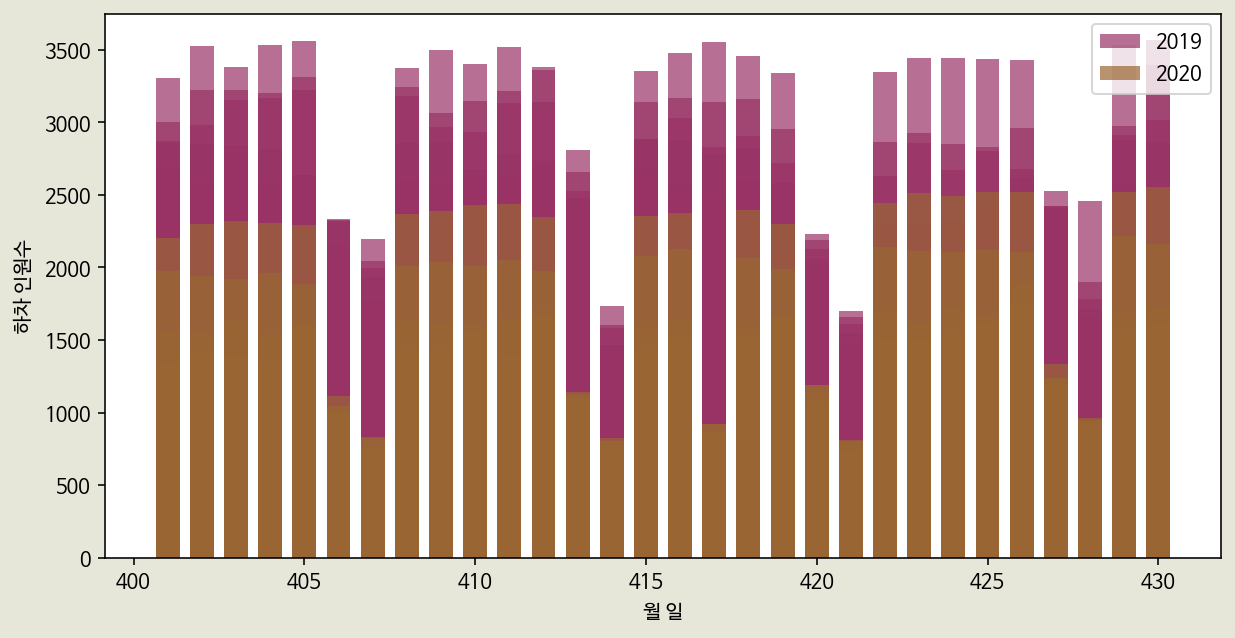

In [24]:
#4월의 하차인원수 일별 비교
start = min(subway_2019_st.index[subway_2019_st['RUN'] == 401])
end = min(subway_2019_st.index[subway_2019_st['RUN'] == 501])

plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xlabel("월 일")
plt.ylabel("하차 인원수")
plt.bar(subway_2019_st['RUN'][start:end], subway_2019_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.2,0.4), alpha=0.7, width=0.7, label='2019')
plt.bar(subway_2019_st['RUN'][start:end], subway_2020_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.4,0.2), alpha=0.7, width=0.7, label='2020')
plt.legend()
plt.show()

### 5월 2019 vs 2020 하차 인원수 일별 비교

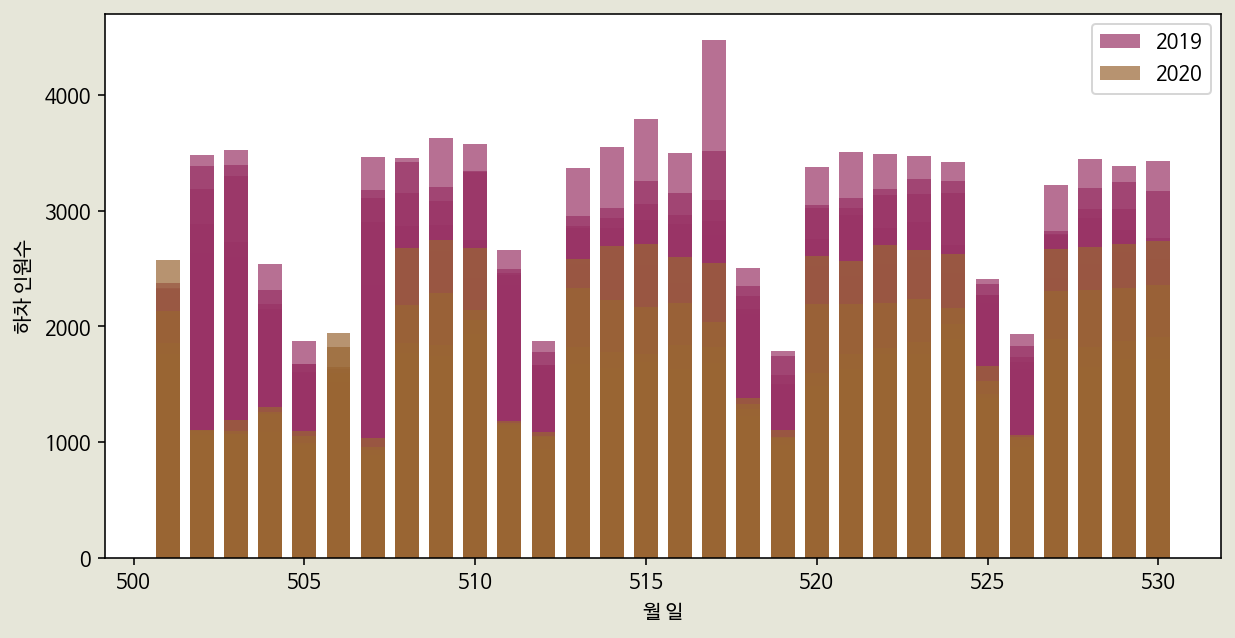

In [25]:
#5월의 하차인원수 일별 비교
start = min(subway_2019_st.index[subway_2019_st['RUN'] == 501])
end = min(subway_2019_st.index[subway_2019_st['RUN'] == 531])

plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xlabel("월 일")
plt.ylabel("하차 인원수")
plt.bar(subway_2019_st['RUN'][start:end], subway_2019_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.2,0.4), alpha=0.7, width=0.7, label='2019')
plt.bar(subway_2019_st['RUN'][start:end], subway_2020_st['SBWY_GOFF_PRNB'][start:end], color=(0.6,0.4,0.2), alpha=0.7, width=0.7, label='2020')
plt.legend()
plt.show()

### 회기역에서 시간 별 데이터 살펴보기

In [26]:
station = '회기'

subway_2019_st2 = subway_2019[subway_2019['SBWY_STN_CD_NM']==station]
subway_2020_st2 = subway_2020[subway_2020['SBWY_STN_CD_NM']==station]

subway_2019_st2.index = [i for i in range(len(subway_2019_st2))]
subway_2020_st2.index = [i for i in range(len(subway_2020_st2))]

In [27]:
#특정 역 기준 2019년 대비 2020년 하차객수의 차이
scale = 17
start = 0
end = 16

y_2019 = subway_2019_st2.loc[start:end, 'SBWY_GOFF_PRNB']
reference_2019 = subway_2019_st2.loc[start:end, 'TMWD_DV']
y_2020 = subway_2020_st2.loc[start:end, 'SBWY_GOFF_PRNB']
reference_2020 = subway_2020_st2.loc[start:end, 'TMWD_DV']

reference_2019.index = [i for i in range(len(reference_2019))]
reference_2020.index = [i for i in range(len(reference_2020))]
y_2019.index = [i for i in range(len(y_2019))]
y_2020.index = [i for i in range(len(y_2020))]

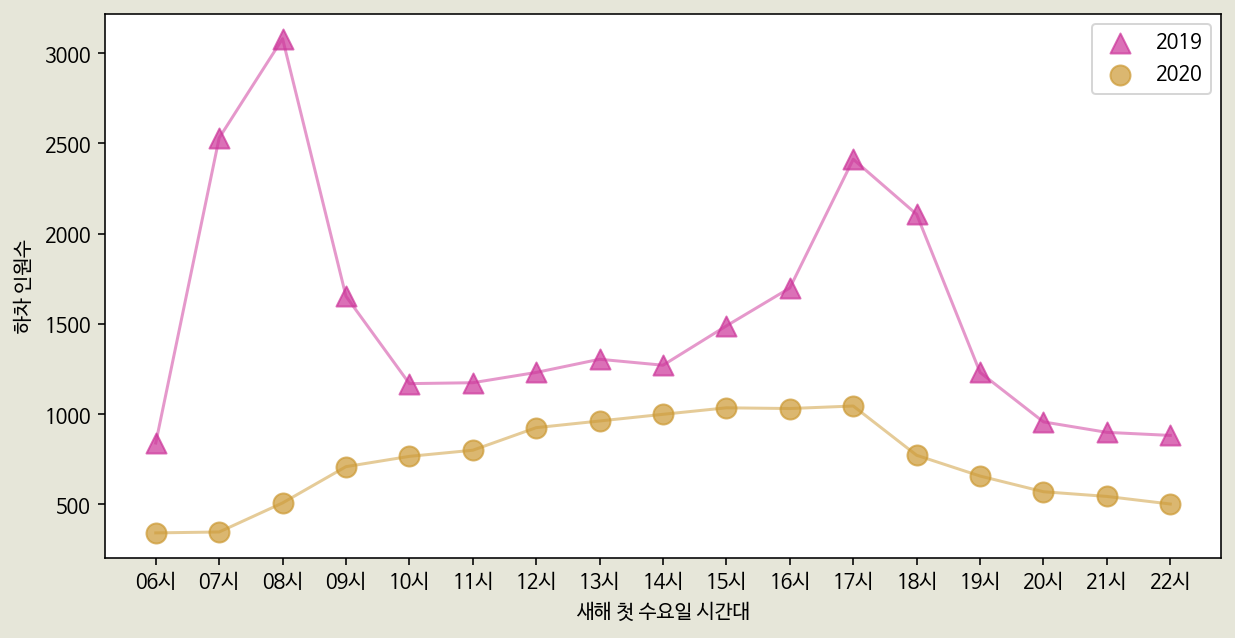

In [28]:
rang = np.linspace(start, end, scale)
plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.xticks(ticks=[i for i in rang], labels=reference_2019[rang])
plt.xticks(ticks=[i for i in rang], labels=reference_2020[rang])
plt.scatter(y_2019.index, y_2019, color=(0.8,0.2,0.6), alpha=0.7, label='2019', s=100, marker='^')
plt.plot(y_2019.index, y_2019, color=(0.8,0.2,0.6), alpha=0.5)
plt.scatter(y_2020.index, y_2020, color=(0.8,0.6,0.2), alpha=0.7, label='2020', s=100, marker='o')
plt.plot(y_2020.index, y_2020, color=(0.8,0.6,0.2), alpha=0.5)
plt.xlabel("새해 첫 수요일 시간대")
plt.ylabel("하차 인원수")
plt.legend()
plt.show()

### 회기역에서 요일별 시간별 데이터 시각화

In [29]:
L2 = scale * 1

y_2_2019 = subway_2019_st2.loc[start+L2:end+L2, 'SBWY_GOFF_PRNB']
reference_2_2019 = subway_2019_st2.loc[start+L2:end+L2, 'TMWD_DV']
y_2_2020 = subway_2020_st2.loc[start+L2:end+L2, 'SBWY_GOFF_PRNB']
reference_2_2020 = subway_2020_st2.loc[start+L2:end+L2, 'TMWD_DV']

reference_2_2019.index = [i for i in range(len(reference_2_2019))]
reference_2_2020.index = [i for i in range(len(reference_2_2020))]
y_2_2019.index = [i for i in range(len(y_2_2019))]
y_2_2020.index = [i for i in range(len(y_2_2020))]

In [30]:
L3 = scale * 2

y_3_2019 = subway_2019_st2.loc[start+L3:end+L3, 'SBWY_GOFF_PRNB']
reference_3_2019 = subway_2019_st2.loc[start+L3:end+L3, 'TMWD_DV']
y_3_2020 = subway_2020_st2.loc[start+L3:end+L3, 'SBWY_GOFF_PRNB']
reference_3_2020 = subway_2020_st2.loc[start+L3:end+L3, 'TMWD_DV']

reference_3_2019.index = [i for i in range(len(reference_3_2019))]
reference_3_2020.index = [i for i in range(len(reference_3_2020))]
y_3_2019.index = [i for i in range(len(y_3_2019))]
y_3_2020.index = [i for i in range(len(y_3_2020))]

In [31]:
L4 = scale * 3

y_4_2019 = subway_2019_st2.loc[start+L4:end+L4, 'SBWY_GOFF_PRNB']
reference_4_2019 = subway_2019_st2.loc[start+L4:end+L4, 'TMWD_DV']
y_4_2020 = subway_2020_st2.loc[start+L4:end+L4, 'SBWY_GOFF_PRNB']
reference_4_2020 = subway_2020_st2.loc[start+L4:end+L4, 'TMWD_DV']

reference_4_2019.index = [i for i in range(len(reference_4_2019))]
reference_4_2020.index = [i for i in range(len(reference_4_2020))]
y_4_2019.index = [i for i in range(len(y_4_2019))]
y_4_2020.index = [i for i in range(len(y_4_2020))]

In [32]:
L5 = scale * 4

y_5_2019 = subway_2019_st2.loc[start+L5:end+L5, 'SBWY_GOFF_PRNB']
reference_5_2019 = subway_2019_st2.loc[start+L5:end+L5, 'TMWD_DV']
y_5_2020 = subway_2020_st2.loc[start+L5:end+L5, 'SBWY_GOFF_PRNB']
reference_5_2020 = subway_2020_st2.loc[start+L5:end+L5, 'TMWD_DV']

reference_5_2019.index = [i for i in range(len(reference_5_2019))]
reference_5_2020.index = [i for i in range(len(reference_5_2020))]
y_5_2019.index = [i for i in range(len(y_5_2019))]
y_5_2020.index = [i for i in range(len(y_5_2020))]

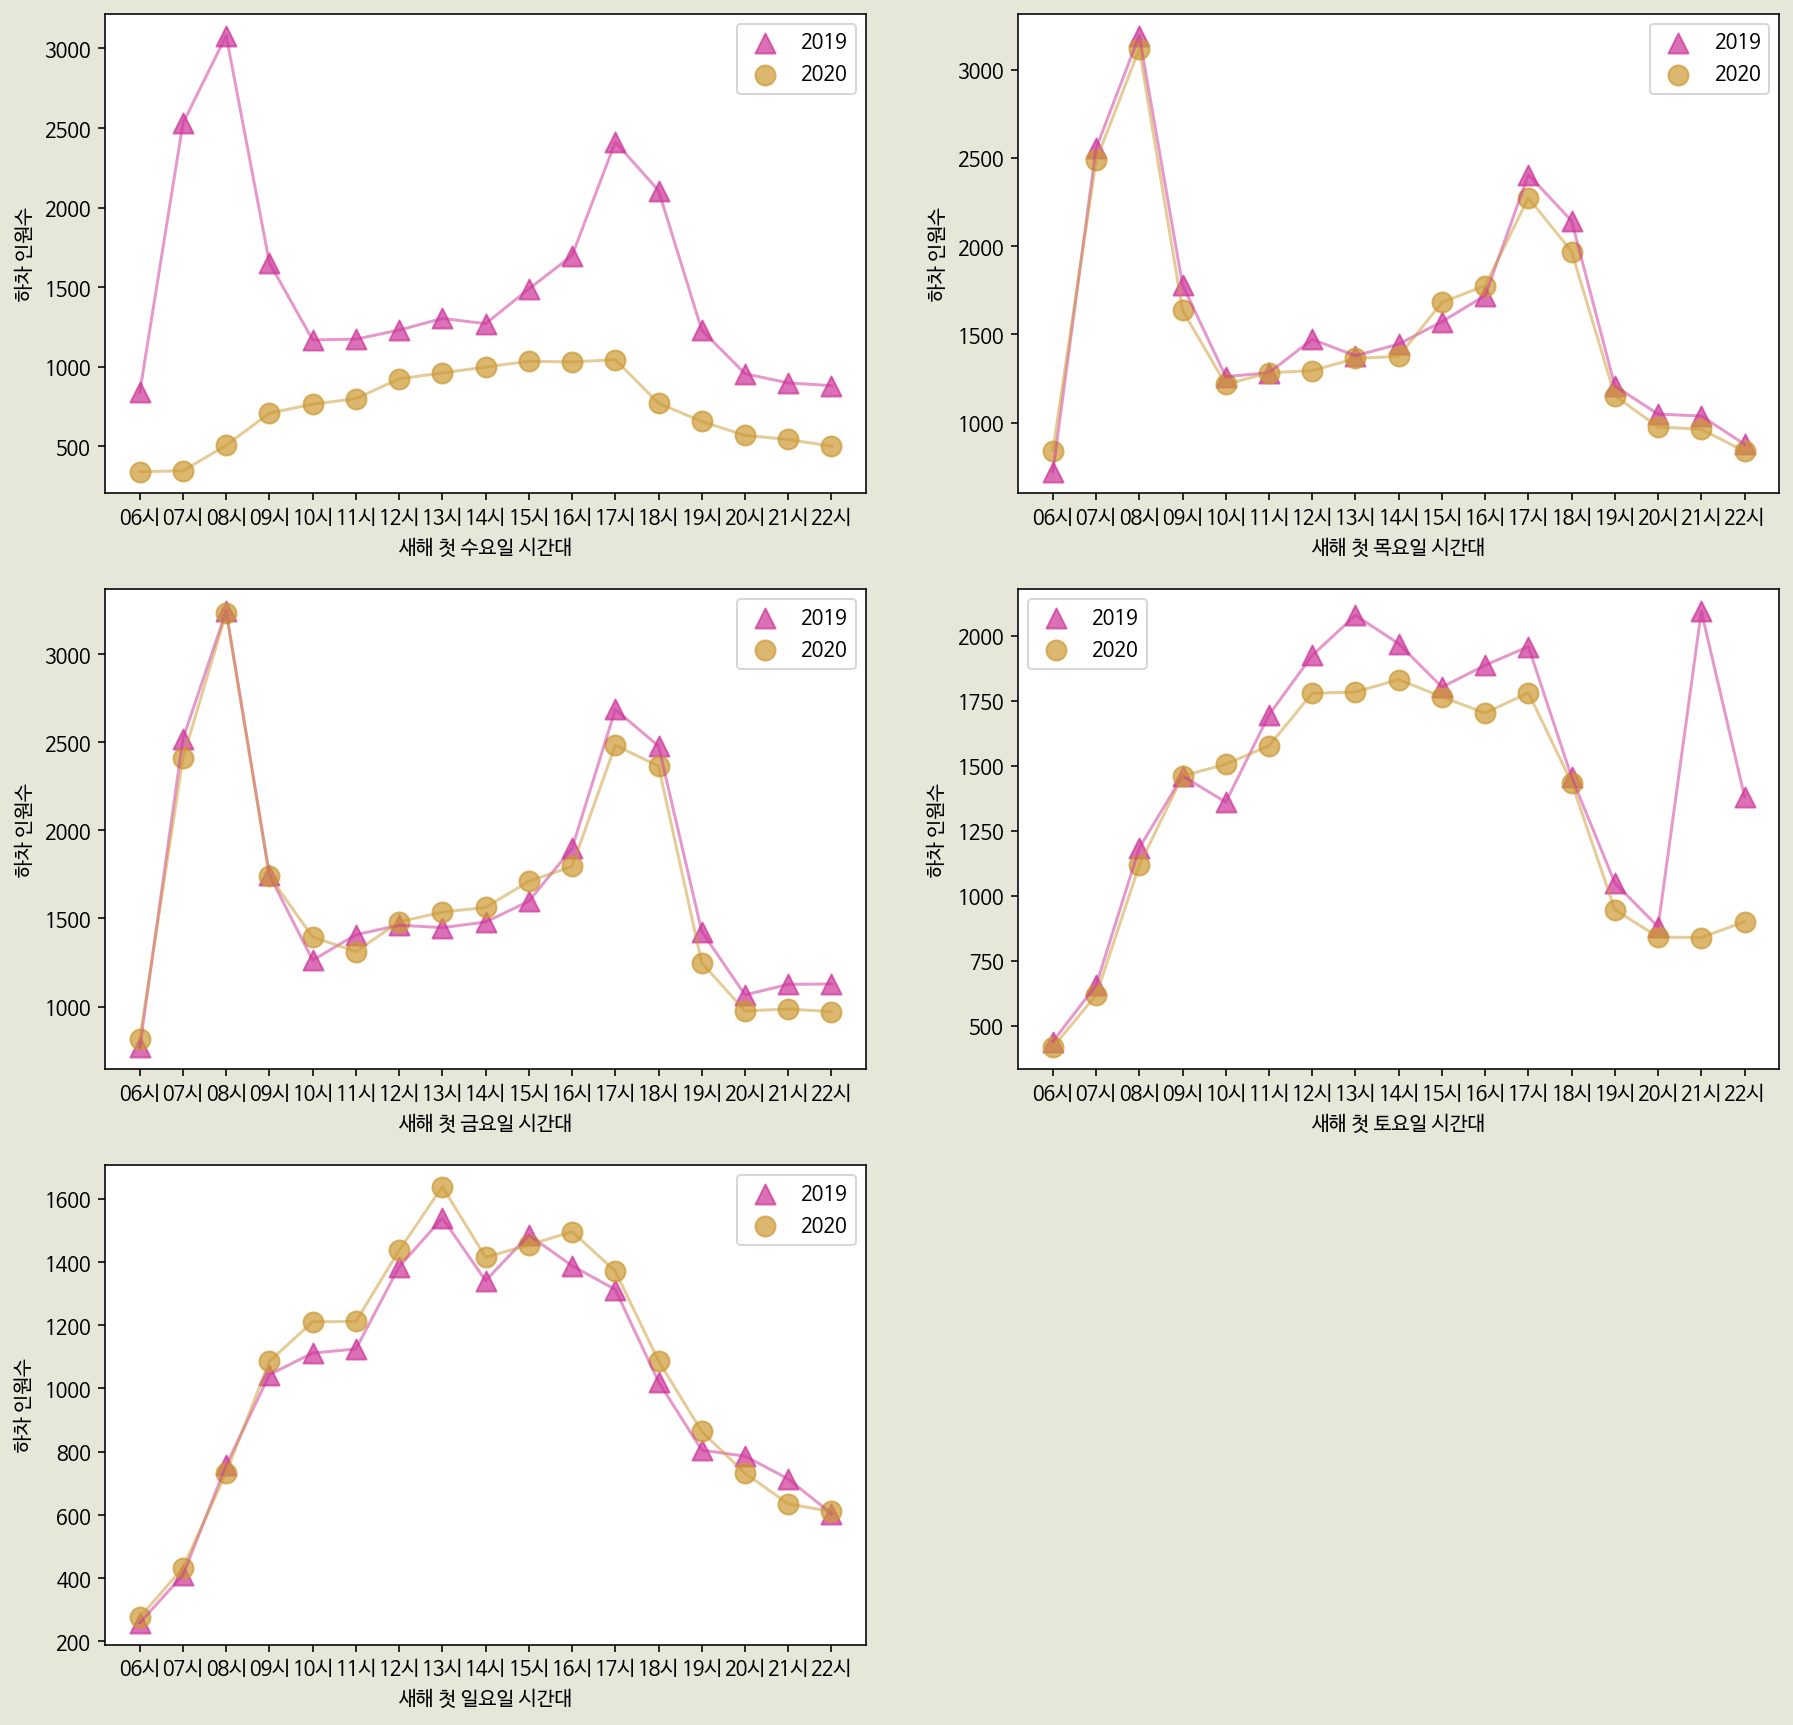

In [33]:
rang = np.linspace(start, end, scale)
plt.figure(figsize=(15, 15), facecolor=(0.9, 0.9, 0.85))

plt.subplot(321)
plt.xticks(ticks=[i for i in rang], labels=reference_2019[rang])
plt.xticks(ticks=[i for i in rang], labels=reference_2020[rang])
plt.scatter(y_2019.index, y_2019, color=(0.8,0.2,0.6), alpha=0.7, label='2019', s=100, marker='^')
plt.plot(y_2019.index, y_2019, color=(0.8,0.2,0.6), alpha=0.5)
plt.scatter(y_2020.index, y_2020, color=(0.8,0.6,0.2), alpha=0.7, label='2020', s=100, marker='o')
plt.plot(y_2020.index, y_2020, color=(0.8,0.6,0.2), alpha=0.5)
plt.xlabel("새해 첫 수요일 시간대")
plt.ylabel("하차 인원수")
plt.legend()

plt.subplot(322)
plt.xticks(ticks=[i for i in rang], labels=reference_2_2019[rang])
plt.xticks(ticks=[i for i in rang], labels=reference_2_2020[rang])
plt.scatter(y_2_2019.index, y_2_2019, color=(0.8,0.2,0.6), alpha=0.7, label='2019', s=100, marker='^')
plt.plot(y_2_2019.index, y_2_2019, color=(0.8,0.2,0.6), alpha=0.5)
plt.scatter(y_2_2020.index, y_2_2020, color=(0.8,0.6,0.2), alpha=0.7, label='2020', s=100, marker='o')
plt.plot(y_2_2020.index, y_2_2020, color=(0.8,0.6,0.2), alpha=0.5)
plt.xlabel("새해 첫 목요일 시간대")
plt.ylabel("하차 인원수")
plt.legend()


plt.subplot(323)
plt.xticks(ticks=[i for i in rang], labels=reference_3_2019[rang])
plt.xticks(ticks=[i for i in rang], labels=reference_3_2020[rang])
plt.scatter(y_3_2019.index, y_3_2019, color=(0.8,0.2,0.6), alpha=0.7, label='2019', s=100, marker='^')
plt.plot(y_3_2019.index, y_3_2019, color=(0.8,0.2,0.6), alpha=0.5)
plt.scatter(y_3_2020.index, y_3_2020, color=(0.8,0.6,0.2), alpha=0.7, label='2020', s=100, marker='o')
plt.plot(y_3_2020.index, y_3_2020, color=(0.8,0.6,0.2), alpha=0.5)
plt.xlabel("새해 첫 금요일 시간대")
plt.ylabel("하차 인원수")
plt.legend()

plt.subplot(324)
plt.xticks(ticks=[i for i in rang], labels=reference_4_2019[rang])
plt.xticks(ticks=[i for i in rang], labels=reference_4_2020[rang])
plt.scatter(y_4_2019.index, y_4_2019, color=(0.8,0.2,0.6), alpha=0.7, label='2019', s=100, marker='^')
plt.plot(y_4_2019.index, y_4_2019, color=(0.8,0.2,0.6), alpha=0.5)
plt.scatter(y_4_2020.index, y_4_2020, color=(0.8,0.6,0.2), alpha=0.7, label='2020', s=100, marker='o')
plt.plot(y_4_2020.index, y_4_2020, color=(0.8,0.6,0.2), alpha=0.5)
plt.xlabel("새해 첫 토요일 시간대")
plt.ylabel("하차 인원수")
plt.legend()


plt.subplot(325)
plt.xticks(ticks=[i for i in rang], labels=reference_5_2019[rang])
plt.xticks(ticks=[i for i in rang], labels=reference_5_2020[rang])
plt.scatter(y_5_2019.index, y_5_2019, color=(0.8,0.2,0.6), alpha=0.7, label='2019', s=100, marker='^')
plt.plot(y_5_2019.index, y_5_2019, color=(0.8,0.2,0.6), alpha=0.5)
plt.scatter(y_5_2020.index, y_5_2020, color=(0.8,0.6,0.2), alpha=0.7, label='2020', s=100, marker='o')
plt.plot(y_5_2020.index, y_5_2020, color=(0.8,0.6,0.2), alpha=0.5)
plt.xlabel("새해 첫 일요일 시간대")
plt.ylabel("하차 인원수")
plt.legend()

plt.show()

### &nbsp;&nbsp;지하철 경의중앙선 회기역 기준 동일 시점 동일 요일들의 평균 하차 인원수를 보면 전체적으로는 줄어든것을 알수있습니다. 하지만 그중에 2019년도 토요일 21시기준 승객수를 보면 일반적인 추세와 다른것을 알 수 있습니다. 이런 시간대의 경우 모든 역에 정차하는 열차들 보다 안전하게 목적지에 도착할 수 있는 지하철 한대가 중요하다고 생각합니다. 따라서 회기역에 21시 전후로 정차하는 열차의 수를 줄일 수 있다는 결론이 나옵니다.

## 2019대비 2020년도 역별 평균 이용객수의 차이

중랑, 회기, 청량리, 왕십리
['중랑', '회기', '청량리', '왕십리']

Difference between 2020 and 2019


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


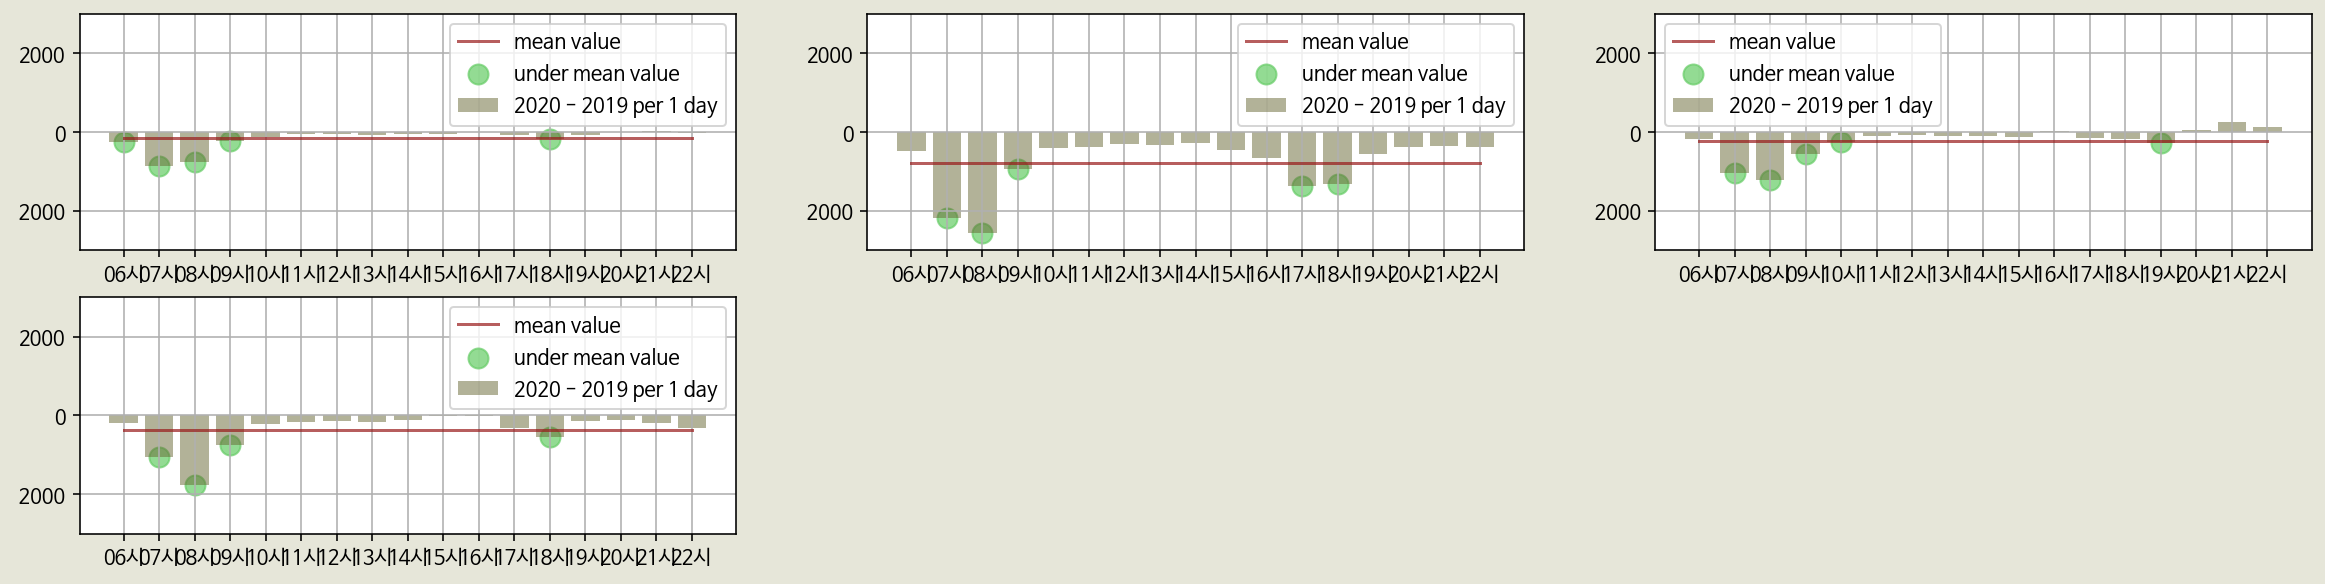

In [39]:
#2019대비 2020년도 역별 평균 이용객수의 차이
scale = 17
start = 0
end = 16

smp_stations = input().split(", ")

print(smp_stations)
print()

print('Difference between 2020 and 2019')
plt.figure(figsize=(20, 10), facecolor=(0.9, 0.9, 0.85))
mean_lst = []
for idx, station in enumerate(smp_stations):
    
    subway_2019_st2 = subway_2019[subway_2019['SBWY_STN_CD_NM']==station]
    subway_2020_st2 = subway_2020[subway_2020['SBWY_STN_CD_NM']==station]

    subway_2019_st2.index = [i for i in range(len(subway_2019_st2))]
    subway_2020_st2.index = [i for i in range(len(subway_2020_st2))]

    
    buf1 = subway_2019_st2.loc[start:end]
    buf2 = subway_2020_st2.loc[start:end]
    
    buf1.index = [i for i in range(len(buf1))]
    buf2.index = [i for i in range(len(buf2))]
    diff = pd.Series(buf2['SBWY_GOFF_PRNB'] - buf1['SBWY_GOFF_PRNB'])
    mean = sum(diff) / len(diff)
    re_diff = diff[diff < mean]
    diff = diff.values.tolist()    
    mean_lst.append(mean)

    plt.subplot(431 +  idx)
    plt.xlabel = 'Hour per 1 day'
    plt.ylabel = 'population per station'
    data1 = plt.bar(buf1['TMWD_DV'], diff, color=(0.4, 0.4, 0.2), alpha=0.5, label="2020 - 2019 per 1 day")
    data2 = plt.scatter(buf1.loc[re_diff.index, 'TMWD_DV'], re_diff, color=(0.4, 0.8, 0.4), alpha=0.7, s=100, label='under mean value')
    mean = plt.plot(buf1['TMWD_DV'], [mean for _ in range(len(buf1['TMWD_DV']))], alpha=0.7, color=(0.6, 0.1, 0.1), label='mean value')
    ''' plt.xlabel("역 명")
    plt.ylabel("역 별 하차 인원수 차이")'''
    plt.grid()
    plt.ylim(-3000, 3000)
    plt.legend()
plt.show()

## 역 별 평균 하차 인원수 차이(년 단위)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


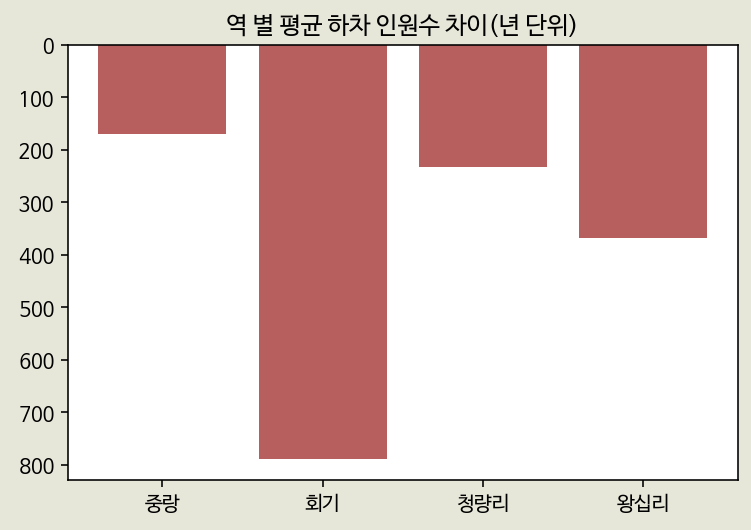

In [44]:
#역 별 평균 하차 인원수 차이(년 단위)
plt.figure(facecolor=(0.9, 0.9, 0.85))
plt.title("역 별 평균 하차 인원수 차이(년 단위)")
plt.bar(smp_stations, mean_lst, alpha=0.7, color=(0.6, 0.1, 0.1), label='mean value per station')
plt.show()

### &nbsp;&nbsp;위 데이터들을 바탕으로 필요한 구간의 역들을 검색하여 열차들의 출발역 발차 시간을 조정할 수 있습니다. 시간표를 역별 시간대별로 분석할 경우 많은 변수를 고려해야 할 뿐 아니라 열차 시간표 또한 복잡해 질 수 있습니다. 따라서 역별 시간대별 평균을 이용하는것 보다 위와같이 연평균 이용객수를 활용하여 시간대에 관계 없이 일괄적으로 정차/미정차역 시간표를 조율할수도 있어 보입니다. 



##### &nbsp;&nbsp;일반적인 지하철 노선들은 1차선 선로이기 때문에 일반적으로 앞차보다 뒷차가 먼저 갈 수 없습니다. 따라서 앞차가 정차하는 시간을 고려하여 뒷차가 발차하고 뒷차가 정차하는 시간은 앞차와의 간격을 조정할 수 있기 때문에 미정차 역의 수와 위치, 발차시간만 조정하면 지금과 다르지 않은 열차 운행 횟수를 보장 할 수 있습니다.

In [49]:
from datetime import datetime, timedelta

## 한 개의 역 당 정차 시간(분) ##
min = 2

## 출발역(중랑역)의 발차시간 간격 : 회기역 미정차##
k= 1 * min

## 출발역(중랑역)의 발차시간 정각 오전 7시 ##
time1 = datetime(2020, 1, 1, 7, 0, 0)

## 출발역(중랑역)의 다음 발차시간 ##
time2 = (time1 + timedelta(minutes = k))
print("중랑역의 기준 발차시간 :", time1)
print("중랑역의 다음 발차시간 :", time2)

중랑역의 기준 발차시간 : 2020-01-01 07:00:00
중랑역의 다음 발차시간 : 2020-01-01 07:02:00


### &nbsp;&nbsp;중랑역에서 오전 7시 기준으로, 열차들의 정차역을 2개의 군으로 나누어 1군의 역과 2군의 역 일부를 정차하지 않는다고 가정했을때 출발역 발차시간을 위의 셀에 간단하게 나타보았습니다. 단 모든 열차가 미정차역을 가진다면 매우 큰 혼란이 올 수 있으므로 이를 감안하여 각 시간대의 정각의 경우 모든 역에 정차하는 열차를 배차하되 이를 감안하여 특정 시간대의 마지막 열차는 정각열차와의 간격을 크게 두어야 할 것으로 보입니다.

##### &nbsp;&nbsp;열차를 운행할때 1군에 속한 역에 미정차하는 지하철이 1군에 속한역에 정차하는 지하철 보다 한역 적게 정차한다는 기본 조건을 걸고 하나 하나 징검다리 형식으로 시간표를 조율한다면 복잡한 계산 없이 간단하게 지하철 시간표를 조정할 수 있습니다.

### &nbsp;&nbsp;2020년도 1월 1일(수) 기준 코로나의 영향에 적게 받으면서 하차 인원이 많은 역들은 다음과 같습니다.

In [68]:
stations_in_danger = []
diff_in_danger = []
count_in_danger = []

diff_threshold = -5000
count_threshold = 5000

for idx, station in tqdm(enumerate(stations)):
    
    subway_2019_st2 = subway_2019[subway_2019['SBWY_STN_CD_NM']==station]
    subway_2020_st2 = subway_2020[subway_2020['SBWY_STN_CD_NM']==station]

    subway_2019_st2.index = [i for i in range(len(subway_2019_st2))]
    subway_2020_st2.index = [i for i in range(len(subway_2020_st2))]

    
    buf1 = subway_2019_st2.loc[start:end]
    buf2 = subway_2020_st2.loc[start:end]
    
    buf1.index = [i for i in range(len(buf1))]
    buf2.index = [i for i in range(len(buf2))]
    diff = pd.Series(buf2['SBWY_GOFF_PRNB'] - buf1['SBWY_GOFF_PRNB'])
    mean = sum(diff) / len(diff)
    re_diff = diff[diff < mean]
    diff = diff.values.tolist()    
    
    # print(sum(re_diff), sum(buf2['SBWY_GOFF_PRNB']))
    if sum(re_diff) > diff_threshold and sum(buf2['SBWY_GOFF_PRNB']) > count_threshold:
        stations_in_danger.append(station)
        diff_in_danger.append(sum(re_diff))
        count_in_danger.append(sum(buf2['SBWY_GOFF_PRNB']))

263it [00:21, 12.29it/s]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


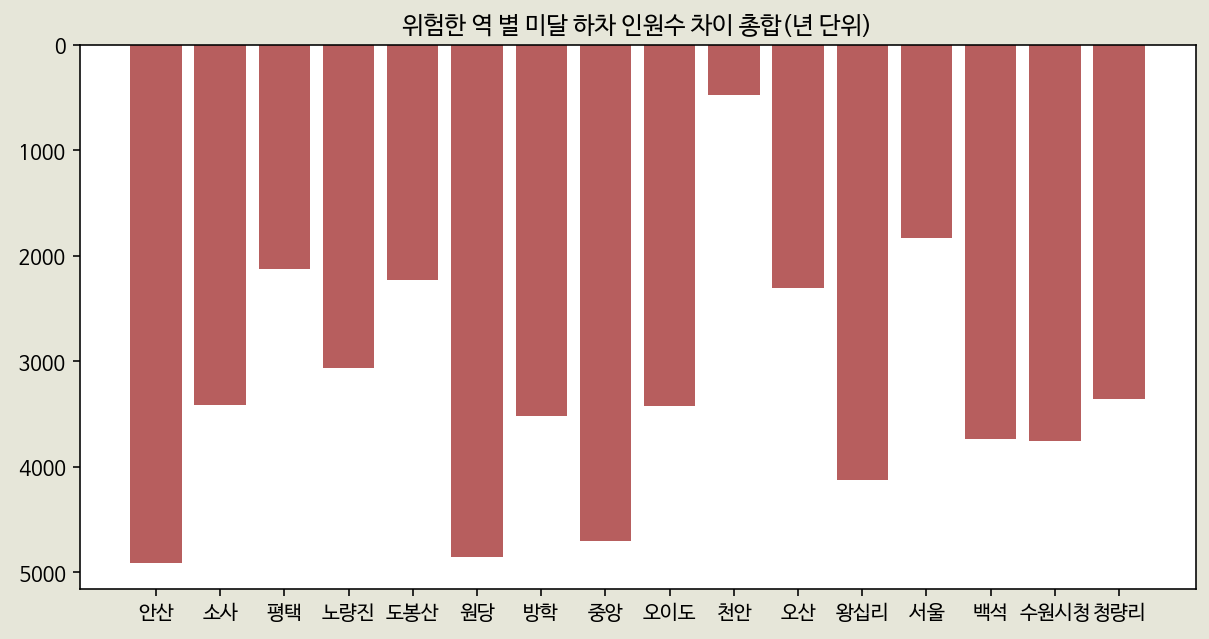

In [77]:
## 위험한 역 별 미달 하차 인원수 차이 총합(년 단위) : 수치가 클수록 위험
plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.title("위험한 역 별 미달 하차 인원수 차이 총합(년 단위)")
plt.bar(stations_in_danger, diff_in_danger, alpha=0.7, color=(0.6, 0.1, 0.1), label='mean value per station')
plt.show()

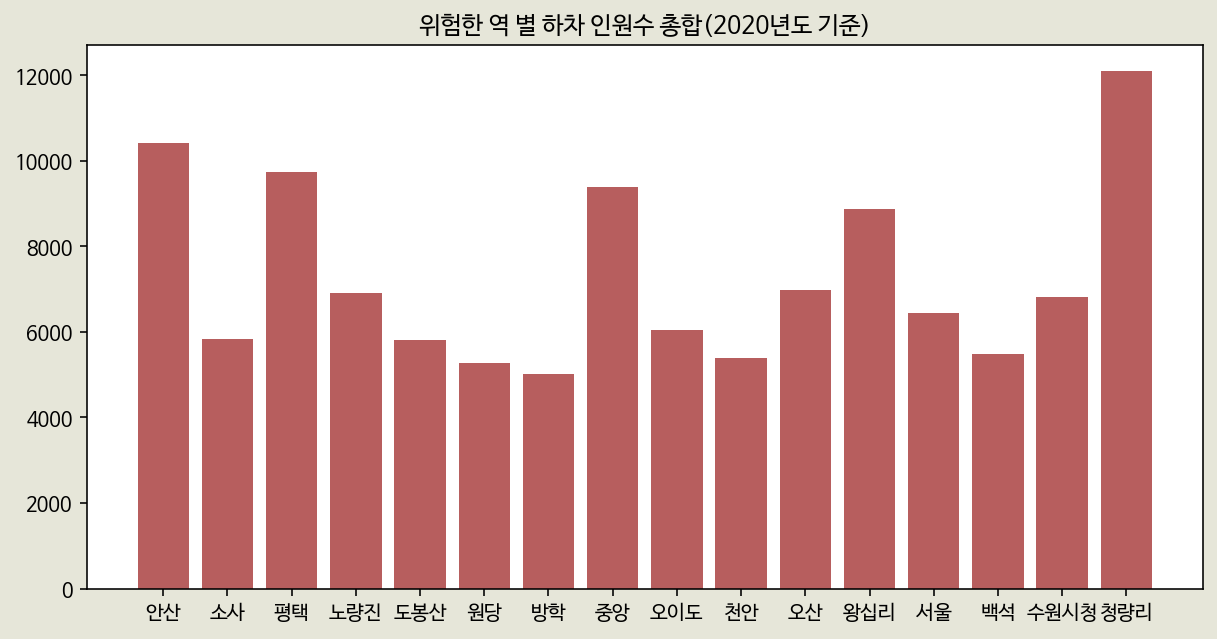

In [78]:
## 위험한 역 별 하차 인원수 총합(2020년도 기준) : 수치가 클수록 위험
plt.figure(figsize=(10, 5), facecolor=(0.9, 0.9, 0.85))
plt.title("위험한 역 별 하차 인원수 총합(2020년도 기준)")
plt.bar(stations_in_danger, count_in_danger, alpha=0.7, color=(0.6, 0.1, 0.1), label='mean value per station')
plt.show()

# 맺음말

### &nbsp;&nbsp;코로나가 재유행하는 이 시점에서 사회적 거리두기는 매우 중요한 화두로 떠오르고있습니다. 사람들이 자발적으로 사회적 거리두기를 잘 실천한다면 빠르게 코로나 시국을 타파할수도 있지만 모두가 그렇지는 않은 것 같습니다. 이러한 시국에서 위와같이 지하철들의 시간적 공간적 거리두기, 마치 징검다리를 건너는 것 처럼 운행하는 지하철 운행방법은 코로나 전염을 막는데도 도움이 되겠지만 사람들의 이동경로 역학조사에 또한 도움이 될 것입니다. 

### &nbsp;&nbsp;물론 익숙하지 않은 지하철 운행시간표에 따른 사회적 혼란과 이용객들의 민원이 제기될 수 있다고 생각합니다. 하지만 많은 지하철들에 설치되어있는 스크린들과 스마트폰등을 활용한 홍보를 통하고, 특정 사회적 거리두기단계(예를들어 1단계 사회적 거리두기)에서만 시행하도록 규정하고 미리 홍보한다면 큰 혼란 없이 적용할 수 있는 방안이라고 생각합니다. 

'본 저작물의 저작권은 Apache License v2.0을 따릅니다'